In [1]:
#loading dataset
import pandas as pd
import numpy as np
import random as rnd

from operator import add

MEDIUM_SIZE = 10
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#EDA
from collections import Counter
import pandas_profiling as pp
# data preprocessing
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#LIME
from skater.core.local_interpretation.lime.lime_tabular import LimeTabularExplainer
from xgboost import XGBClassifier, plot_importance #optimizes the training for Gradient Boosting
import eli5 #debug machine learning classifiers and explain their predictions
from eli5.sklearn import PermutationImportance



In [2]:
data=pd.read_csv('heart.csv')

In [3]:
data.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


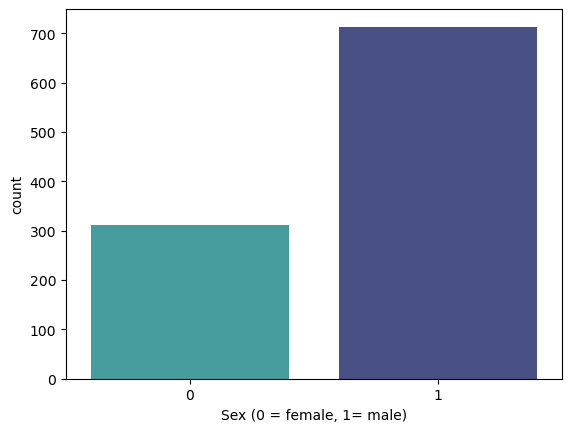

In [5]:
sns.countplot(x='sex', data=data, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

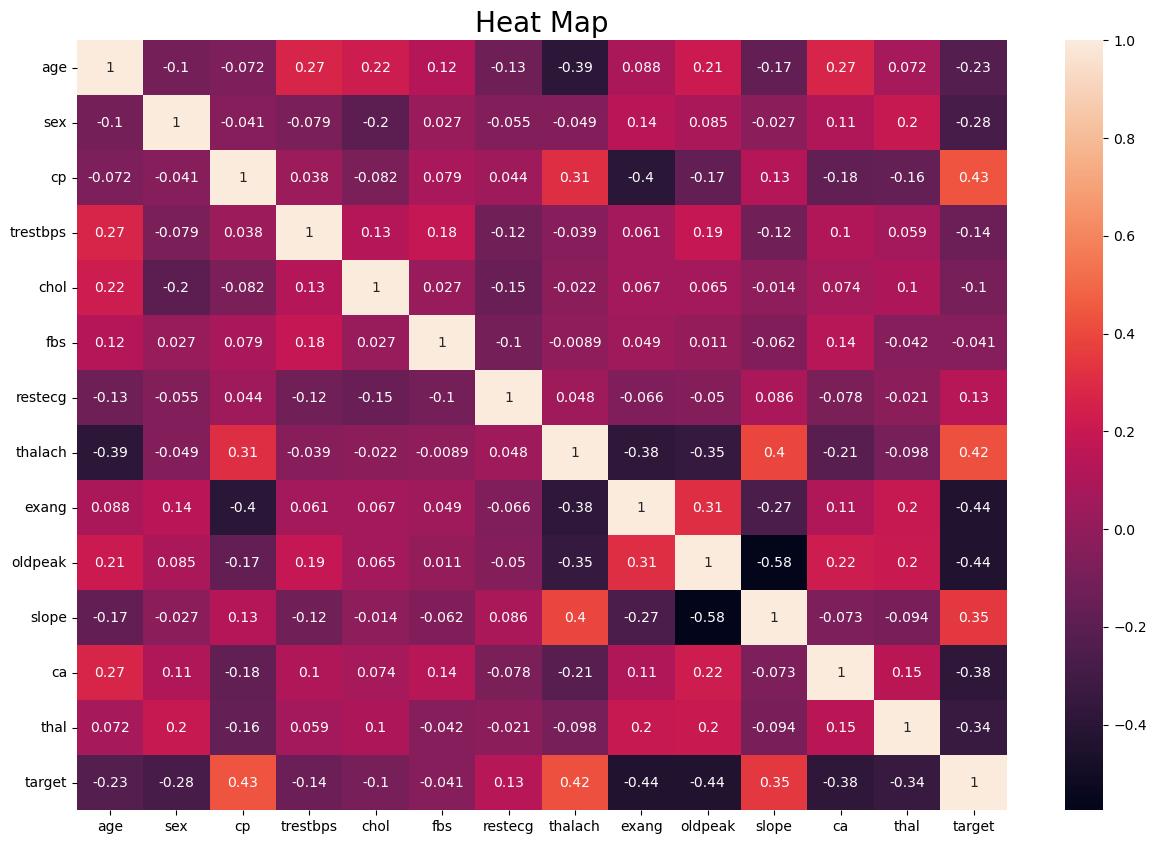

In [6]:
# draw Heat Map 

plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True)
plt.title('Heat Map', size=20)
plt.yticks(rotation = 0)
plt.show()

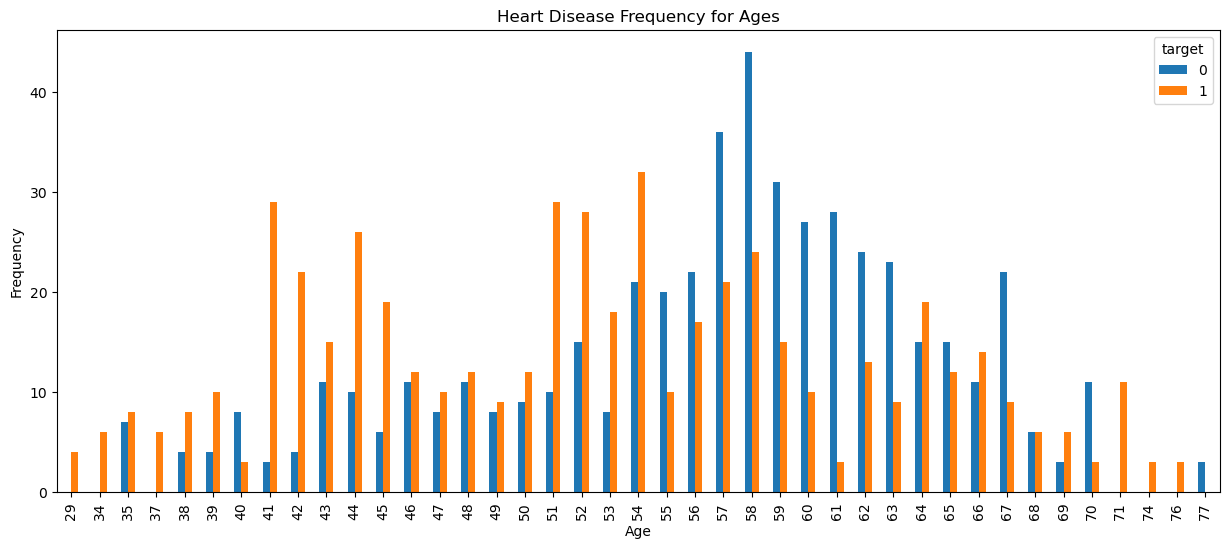

In [7]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

In [8]:
def draw_semi_pie_chart(data, column, fig, renamed_index_dict, title):
    default_colors = ['#66b3ff', '#ff9999', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#ff6666']
    rnd.shuffle(default_colors)
    ax = data[column].value_counts().rename(index = renamed_index_dict).plot.pie(colors = default_colors, autopct='%1.1f%%', startangle=90, title = title)
    ax.set_ylabel('')
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(20)
        
    centre_circle = plt.Circle((0,0), 0.70, fc='white')
    fig.gca().add_artist(centre_circle)

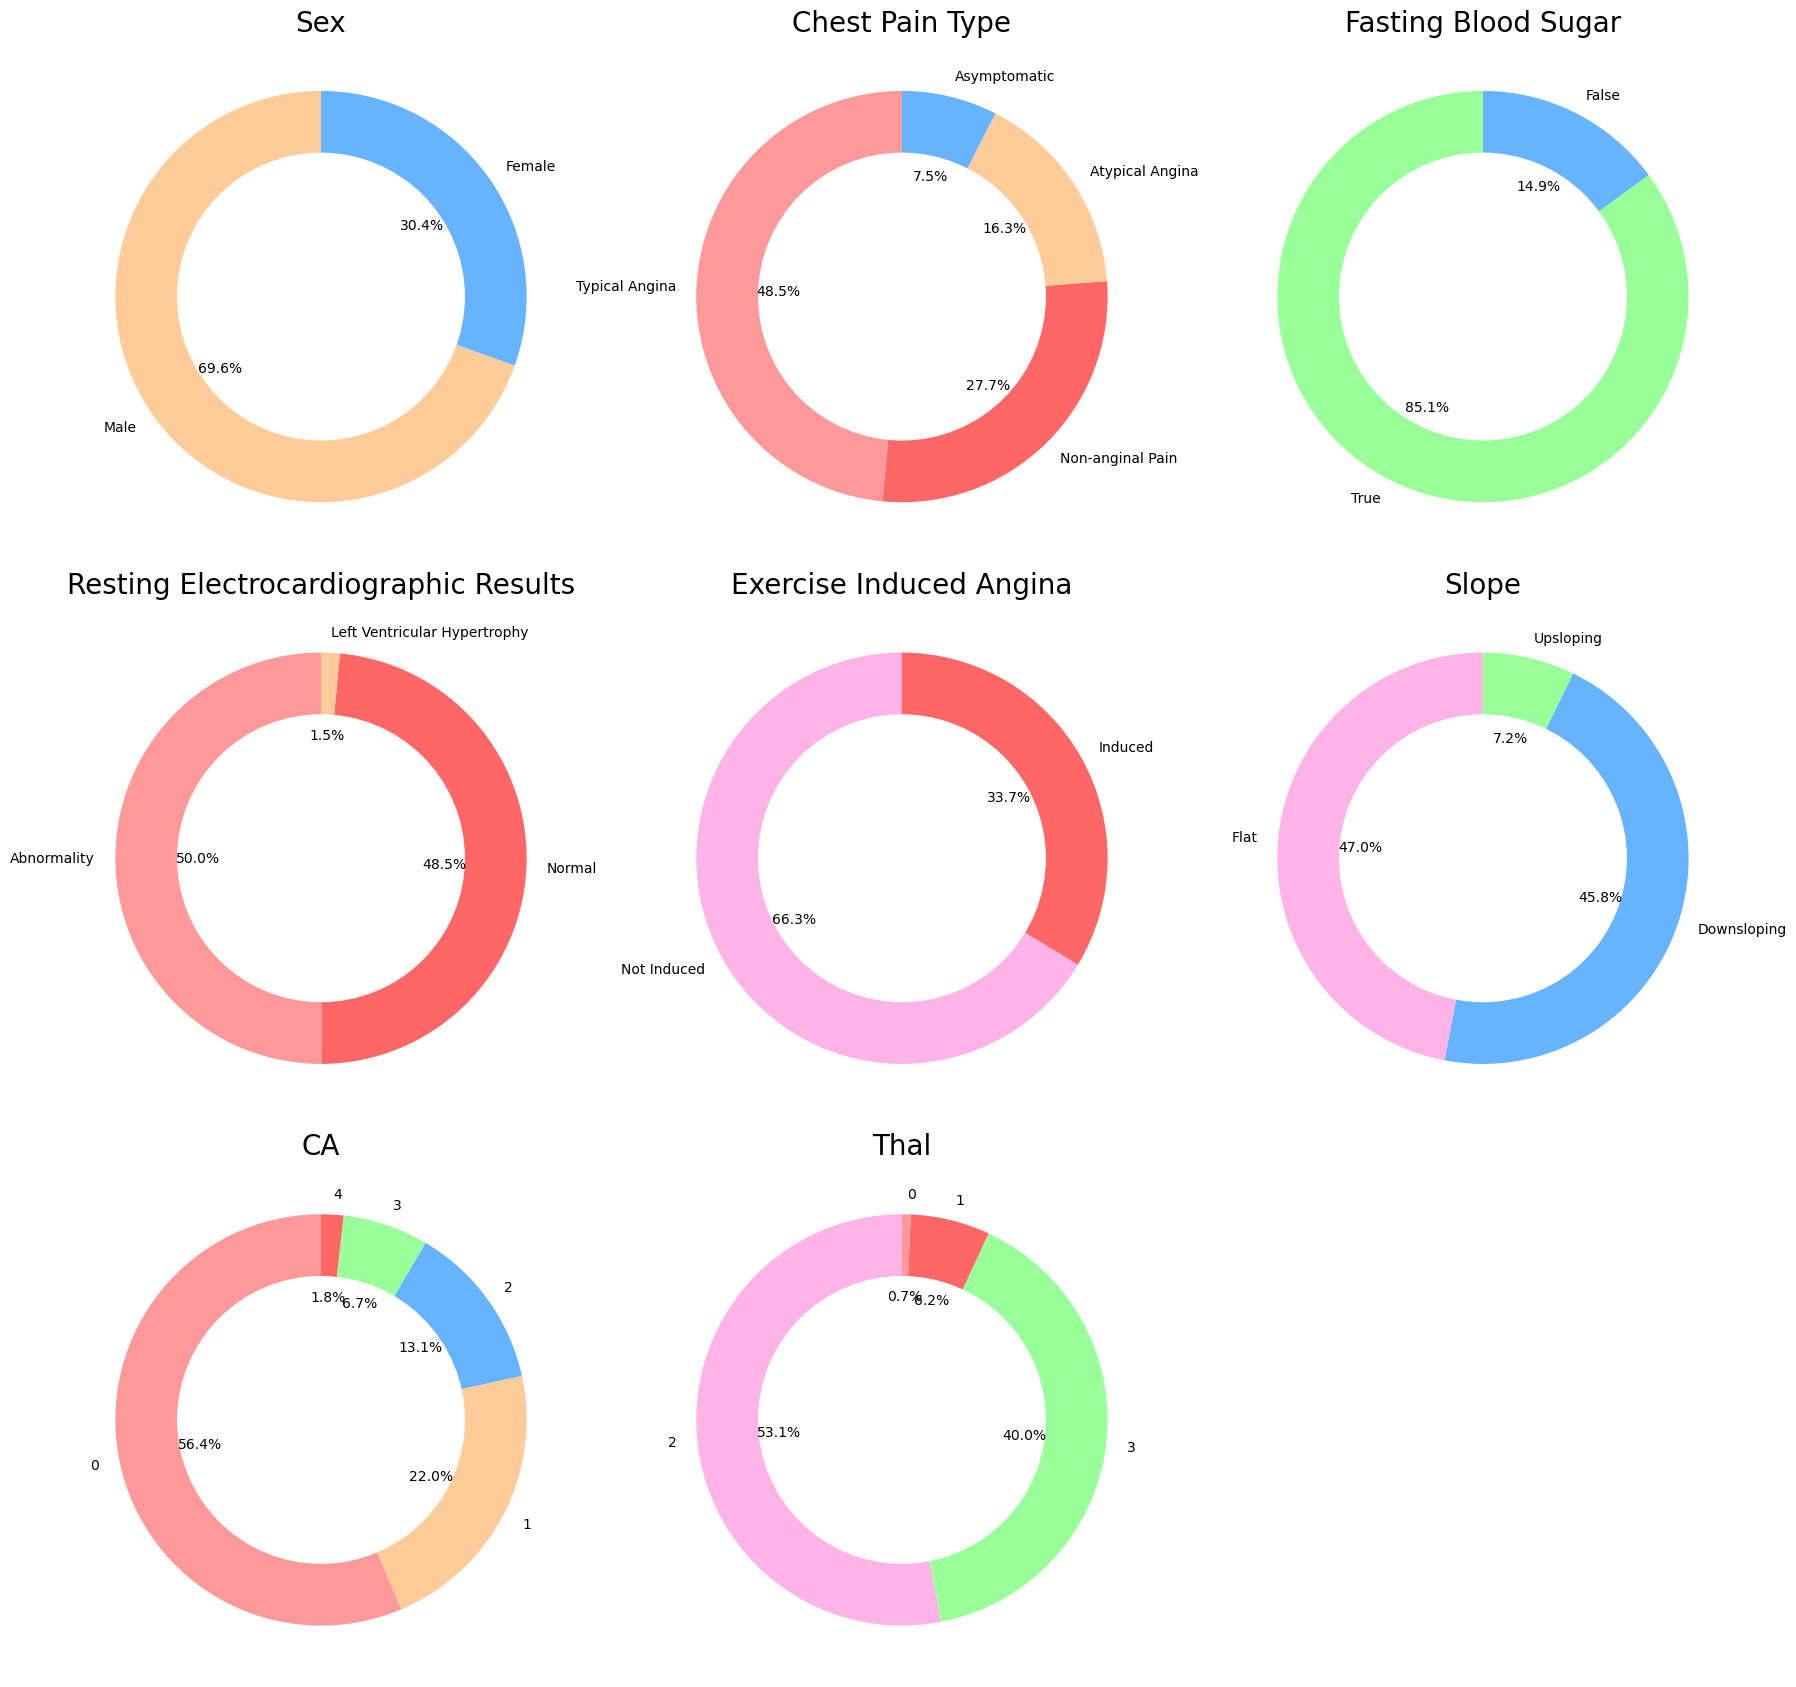

In [9]:
fig = plt.gcf()
fig.set_size_inches(18, 17)
grid_rows = 3
grid_cols = 3

# Draw Sex Pie chart
plt.subplot(grid_rows, grid_cols, 1)
draw_semi_pie_chart(data, 'sex', fig, {0: 'Female', 1: 'Male'}, 'Sex')

# Draw Chest pain type chart
plt.subplot(grid_rows, grid_cols, 2)
draw_semi_pie_chart(data, 'cp', fig, {0:'Typical Angina', 1:'Atypical Angina', 2:'Non-anginal Pain',3:'Asymptomatic'}, 'Chest Pain Type')

# Draw Fasting blood sugar chart
plt.subplot(grid_rows, grid_cols, 3)
draw_semi_pie_chart(data, 'fbs', fig, {0:'True', 1:'False'}, 'Fasting Blood Sugar')

# Draw restecg - resting electrocardiographic results
plt.subplot(grid_rows, grid_cols, 4)
draw_semi_pie_chart(data, 'restecg', fig, {0:'Normal', 1:'Abnormality', 2:'Left Ventricular Hypertrophy'}, 'Resting Electrocardiographic Results')

# Draw exang - exercise induced angina
plt.subplot(grid_rows, grid_cols, 5)
draw_semi_pie_chart(data, 'exang', fig, {0:'Not Induced', 1:'Induced'}, 'Exercise Induced Angina')

# Draw exang - exercise induced angina
plt.subplot(grid_rows, grid_cols, 6)
draw_semi_pie_chart(data, 'slope', fig, {0:'Upsloping', 1:'Flat', 2:'Downsloping'}, 'Slope')

# Draw ca
plt.subplot(grid_rows, grid_cols, 7)
draw_semi_pie_chart(data, 'ca', fig, {0:'0', 1:'1', 2:'2', 3:'3', 4:'4'}, 'CA')

# Draw thal
plt.subplot(grid_rows, grid_cols, 8)
draw_semi_pie_chart(data, 'thal', fig, {0:'0', 1:'1', 2:'2', 3:'3'}, 'Thal')

fig.tight_layout()
plt.show()

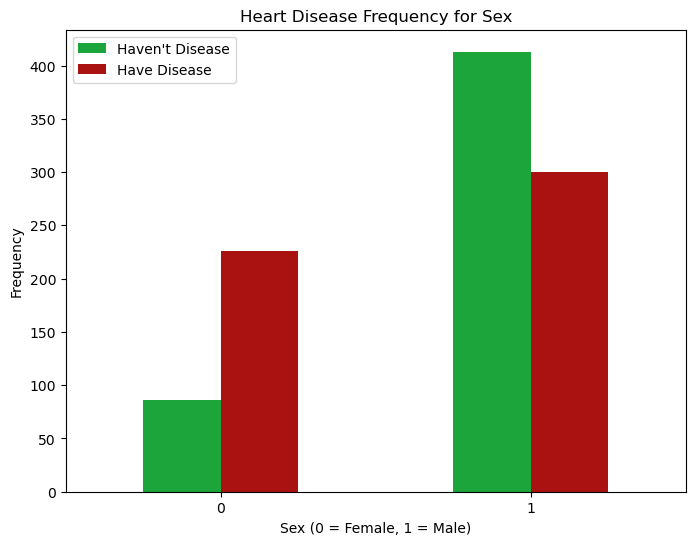

In [10]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(8,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [11]:

def create_percent_stacked_barchart(data, title = None, ylabel = None, xlabel = None):
    default_colors = ['#019600', '#3C5F5A', '#219AD8']
    # From raw value to percentage
    totals = data.sum(axis=1)
    bars = ((data.T / totals) * 100).T
    r = list(range(data.index.size))

    # Plot
    barWidth = 0.95
    names = data.index.tolist()
    bottom = [0] * bars.shape[0]

    # Create bars
    color_index = 0
    plots = []
    for bar in bars.columns:
        plots.append(plt.bar(r, bars[bar], bottom=bottom, color=default_colors[color_index], edgecolor='white', width=barWidth))
        bottom = list(map(add, bottom, bars[bar]))
        color_index = 0 if color_index >= len(default_colors) else color_index + 1

    # Custom x axis
    plt.title(title)
    plt.xticks(r, names)
    plt.xlabel(data.index.name if xlabel is None else xlabel)
    plt.ylabel(data.columns.name if ylabel is None else ylabel)
    ax = plt.gca()
        
    y_labels = ax.get_yticks()
    ax.set_yticklabels([str(y) + '%' for y in y_labels])

    flat_list = [item for sublist in data.T.values for item in sublist]
    for i, d in zip(ax.patches, flat_list):
        data_label = str(d) + " (" + str(round(i.get_height(), 2)) + "%)"
        ax.text(i.get_x() + 0.45, i.get_y() + 5, data_label, horizontalalignment='center', verticalalignment='center', fontdict = dict(color = 'white', size = 20))

    for item in ([ax.title]):
        item.set_fontsize(27)
        
    for item in ([ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(24)
    
    legend = ax.legend(plots, bars.columns.tolist(), fancybox=True)
    plt.setp(legend.get_texts(), fontsize='20')

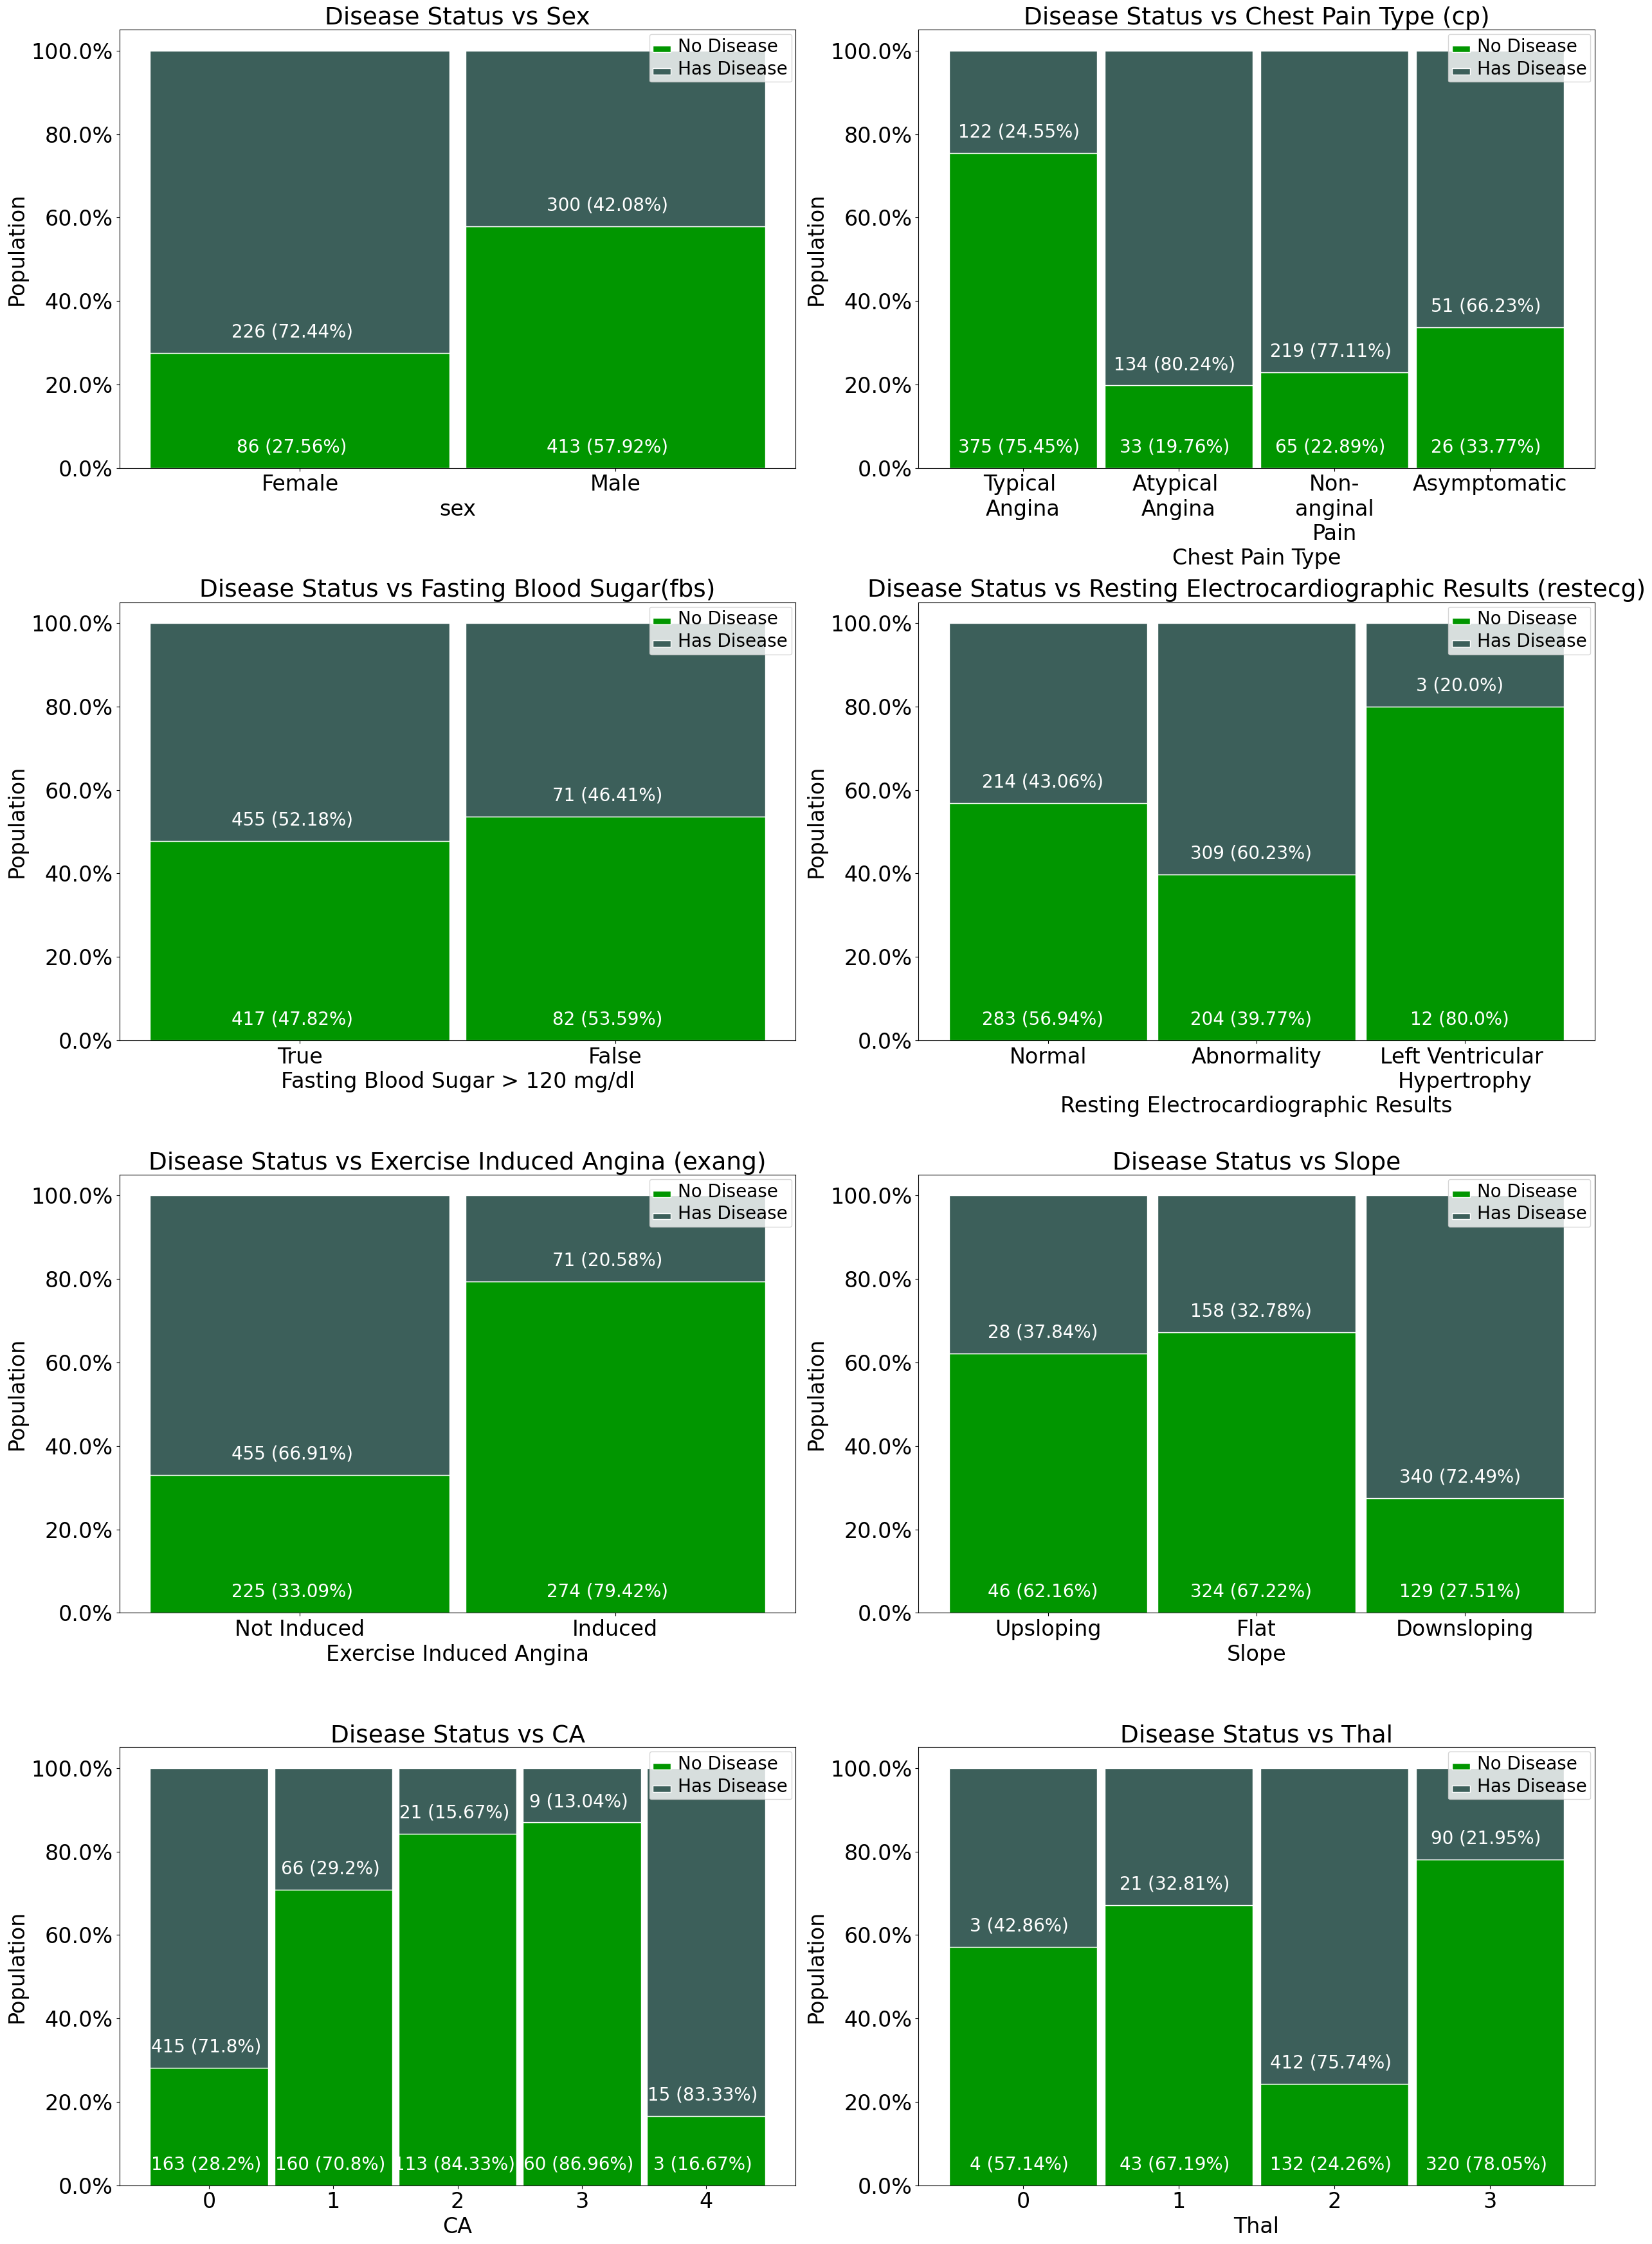

In [12]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

fig = plt.gcf()
fig.set_size_inches(25, 35)
grid_rows = 4
grid_cols = 2

# Draw Disease Status vs Sex chart
plt.subplot(grid_rows, grid_cols, 1)
temp = data[['sex','target']].groupby(['sex','target']).size().unstack('target')
temp.rename(index={0:'Female', 1:'Male'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
create_percent_stacked_barchart(temp, title = 'Disease Status vs Sex', ylabel = 'Population')

# Draw Disease Status vs Chest pain type chart
plt.subplot(grid_rows, grid_cols, 2)
temp = data[['cp','target']].groupby(['cp','target']).size().unstack('target')
temp.rename(index={0:'Typical \nAngina', 1:'Atypical \nAngina', 2:'Non-\nanginal\nPain',3:'Asymptomatic'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
create_percent_stacked_barchart(temp, title = 'Disease Status vs Chest Pain Type (cp)', ylabel = 'Population', xlabel = 'Chest Pain Type')

# Draw fbs - fasting blood sugar chart
plt.subplot(grid_rows, grid_cols, 3)
temp = data[['fbs','target']].groupby(['fbs','target']).size().unstack('target')
temp.rename(index={0:'True', 1:'False'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
create_percent_stacked_barchart(temp, title = 'Disease Status vs Fasting Blood Sugar(fbs)', ylabel = 'Population', xlabel = 'Fasting Blood Sugar > 120 mg/dl')

# Draw restecg - resting electrocardiographic results chart
plt.subplot(grid_rows, grid_cols, 4)
temp = data[['restecg','target']].groupby(['restecg','target']).size().unstack('target')
temp.rename(index={0:'Normal', 1:'Abnormality', 2:'Left Ventricular \nHypertrophy'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
create_percent_stacked_barchart(temp, title = 'Disease Status vs Resting Electrocardiographic Results (restecg)', ylabel = 'Population', xlabel = 'Resting Electrocardiographic Results')

# Draw exang - exercise induced angina chart
plt.subplot(grid_rows, grid_cols, 5)
temp = data[['exang','target']].groupby(['exang','target']).size().unstack('target')
temp.rename(index={0:'Not Induced', 1:'Induced'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
create_percent_stacked_barchart(temp, title = 'Disease Status vs Exercise Induced Angina (exang)', ylabel = 'Population', xlabel = 'Exercise Induced Angina')

# Draw slope - the slope of the peak exercise ST segment chart
plt.subplot(grid_rows, grid_cols, 6)
temp = data[['slope','target']].groupby(['slope','target']).size().unstack('target')
temp.rename(index={0:'Upsloping', 1:'Flat', 2:'Downsloping'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
create_percent_stacked_barchart(temp, title = 'Disease Status vs Slope', ylabel = 'Population', xlabel = 'Slope')

# Draw ca - number of major vessels (0-3) colored by flourosopy chart
plt.subplot(grid_rows, grid_cols, 7)
temp = data[['ca','target']].groupby(['ca','target']).size().unstack('target')
temp.rename(columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
create_percent_stacked_barchart(temp, title = 'Disease Status vs CA', ylabel = 'Population', xlabel = 'CA')

# Draw thal chart
plt.subplot(grid_rows, grid_cols, 8)
temp = data[['thal','target']].groupby(['thal','target']).size().unstack('target')
temp.rename(columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
create_percent_stacked_barchart(temp, title = 'Disease Status vs Thal', ylabel = 'Population', xlabel = 'Thal')
fig.tight_layout()
plt.show()

In [13]:
# Model Preparation
y = data["target"]
X = data.drop('target',axis=1)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [15]:
print(y_test.unique())
Counter(y_train)

[1 0]


Counter({1: 419, 0: 401})

In [16]:
X_train.shape, X_test.shape

((820, 13), (205, 13))

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
# Models

In [19]:
#Logstic Regression
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predicted = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predicted)
lr_acc_score = accuracy_score(y_test, lr_predicted)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predicted))

confussion matrix
[[ 77  21]
 [  7 100]]


Accuracy of Logistic Regression: 86.34146341463415 

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        98
           1       0.83      0.93      0.88       107

    accuracy                           0.86       205
   macro avg       0.87      0.86      0.86       205
weighted avg       0.87      0.86      0.86       205



In [20]:
#Random Forest Classfier
rf = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confussion matrix
[[ 88  10]
 [  3 104]]


Accuracy of Random Forest: 93.65853658536587 

              precision    recall  f1-score   support

           0       0.97      0.90      0.93        98
           1       0.91      0.97      0.94       107

    accuracy                           0.94       205
   macro avg       0.94      0.93      0.94       205
weighted avg       0.94      0.94      0.94       205



In [21]:
#K-neighborsClassifier
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
    
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[84 14]
 [11 96]]


Accuracy of K-NeighborsClassifier: 87.8048780487805 

              precision    recall  f1-score   support

           0       0.88      0.86      0.87        98
           1       0.87      0.90      0.88       107

    accuracy                           0.88       205
   macro avg       0.88      0.88      0.88       205
weighted avg       0.88      0.88      0.88       205



In [22]:
#Model Comparision
model_ev = pd.DataFrame({'Models': ['Logistic Regression','Random Forest','K-Nearest Neighbour'], 
                         'Accuracy': [lr_acc_score*100,rf_acc_score*100,knn_acc_score*100]})

In [23]:
model_ev

Models   Accuracy
0  Logistic Regression  86.341463
1        Random Forest  93.658537
2  K-Nearest Neighbour  87.804878

([<matplotlib.axis.XTick at 0x25317592460>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

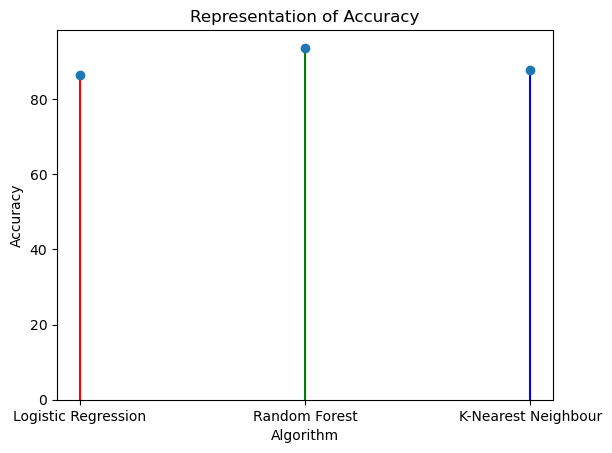

In [24]:
fig, axes = plt.subplots()
colors = ['red','green','blue']
axes.vlines(model_ev['Models'], ymin=0,
            ymax=model_ev['Accuracy'], colors=colors)
axes.plot(model_ev['Models'], model_ev['Accuracy'], "o")
axes.set_ylim(0)
# formatting and details
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Representation of Accuracy')
plt.xticks(model_ev['Models'])

In [25]:
xgb = XGBClassifier(objective='binary:logistic', random_state=33, n_jobs=-1)
xgb.fit(X_train, y_train)
# make predictions for test data
xgb_predictions = xgb.predict(X_test)

In [26]:
tgt = 0
print('Target:', y_test.iloc[tgt])
print('Predicted:', xgb_predictions[tgt])
eli5.show_prediction(xgb.get_booster(), X_test[tgt], 
                     feature_names=list(X.columns))

Target: 1
Predicted: 1


In [27]:
tgt = 1
print('Target:', y_test.iloc[tgt])
print('Predicted:', xgb_predictions[tgt])
eli5.show_prediction(xgb.get_booster(), X_test[tgt], 
                     feature_names=list(X.columns))

Target: 0
Predicted: 0


In [28]:
tgt = 5
print('Target:', y_test.iloc[tgt])
print('Predicted:', xgb_predictions[tgt])
eli5.show_prediction(xgb.get_booster(), X_test[tgt], 
                     feature_names=list(X.columns))

Target: 0
Predicted: 0


In [29]:
exp = LimeTabularExplainer(X_test, 
                           feature_names=X, 
                           discretize_continuous=True, 
                           class_names=['No disease', 'Disease'])

In [30]:
index = 0
print('Target:', y_test.iloc[index])
print('Predicted:', rf_predicted[index])
exp.explain_instance(X_test[index], rf.predict_proba).show_in_notebook()

Target: 1
Predicted: 1


In [31]:
index = 1
print('Target:', y_test.iloc[index])
print('Predicted:', rf_predicted[index])
exp.explain_instance(X_test[index], rf.predict_proba).show_in_notebook()

Target: 0
Predicted: 1


In [32]:
index = 2
print('Target:', y_test.iloc[index])
print('Predicted:', rf_predicted[index])
exp.explain_instance(X_test[index], rf.predict_proba).show_in_notebook()

Target: 0
Predicted: 0


In [33]:
index = 3
print('Target:', y_test.iloc[index])
print('Predicted:', rf_predicted[index])
exp.explain_instance(X_test[index], rf.predict_proba).show_in_notebook()

Target: 1
Predicted: 1


In [34]:
index = 13
print('Target:', y_test.iloc[index])
print('Predicted:', rf_predicted[index])
exp.explain_instance(X_test[index], rf.predict_proba).show_in_notebook()

Target: 0
Predicted: 1


In [35]:
y_test.head(50)

807     1
27      0
77      0
406     1
886     0
1       0
230     0
685     0
925     0
731     0
477     0
482     0
283     1
367     0
478     1
432     1
654     1
728     0
386     1
520     0
85      1
75      1
567     1
103     1
744     1
451     1
272     1
14      0
689     1
1014    1
758     1
481     0
511     0
898     1
492     0
122     0
239     0
614     0
945     1
214     1
646     0
45      1
965     1
31      1
917     1
712     1
841     1
630     0
97      0
308     0
Name: target, dtype: int64

In [36]:
conf_matrix = confusion_matrix(y_test, rf_predicted)

In [37]:
print(conf_matrix)

[[ 88  10]
 [  3 104]]
